In [35]:
import pickle
import pandas as pd
import numpy as np
# Load the dataset from a pickle file
data=pd.read_pickle('/content/email_campaigns.pkl')

In [36]:
#Flattened the nested structure
flattened_data = [(key, item) for d in data for key, items in d.items() for item in items]
df = pd.DataFrame(flattened_data, columns=['example_key', 'nested_data'])

In [37]:
df.head()

,example_key,nested_data
0,example1,{'subject': '🚀 Propel Your Marketing ROI with ...
1,example1,{'subject': 'Data is Your Superpower 📊 Unlock ...
2,example1,{'subject': 'Turn Marketing Data Into Decision...
3,example1,{'subject': 'Marketing Success is a Click Away...
4,example1,{'subject': '🚀 Boost Your Brand's Visibility w...


In [38]:
# Expand the dictionaries into new columns
flattened_data = [(key, item) for d in data for key, items in d.items() for item in items]
df = pd.DataFrame(flattened_data, columns=['example_key', 'nested_data'])
df_expanded = pd.json_normalize(df['nested_data'])
# Concatenate the expanded DataFrame with the original DataFrame
df_result = pd.concat([df, df_expanded], axis=1)
# Display the result
print("\nDataFrame with expanded columns:")
df_result.head()


DataFrame with expanded columns:


,example_key,nested_data,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,example1,{'subject': '🚀 Propel Your Marketing ROI with ...,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN
1,example1,{'subject': 'Data is Your Superpower 📊 Unlock ...,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN
2,example1,{'subject': 'Turn Marketing Data Into Decision...,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN
3,example1,{'subject': 'Marketing Success is a Click Away...,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN
4,example1,{'subject': '🚀 Boost Your Brand's Visibility w...,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN


**Data Cleaning:**

In [39]:
#Examined the columns of the DataFrame to identify potential issues and null values.
df_result.columns

Index(['example_key', 'nested_data', 'subject', 'body', 'opened',
       'meeting link clicked', 'responded', 'meeting_link_clicked'],
      dtype='object')

In [40]:
#Selected a subset of columns for further analysis.
df_new=df_result[['subject', 'body', 'opened',
       'meeting link clicked', 'responded', 'meeting_link_clicked']]
df_new.head()

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN


DATA VISUALISATION

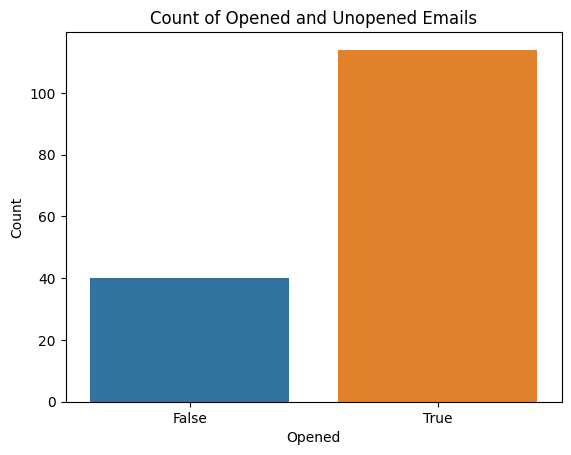

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'opened' is your target variable
sns.countplot(x='opened', data=df_new)
plt.title('Count of Opened and Unopened Emails')
plt.xlabel('Opened')
plt.ylabel('Count')
plt.show()

Count of Opened and Unopened Emails:

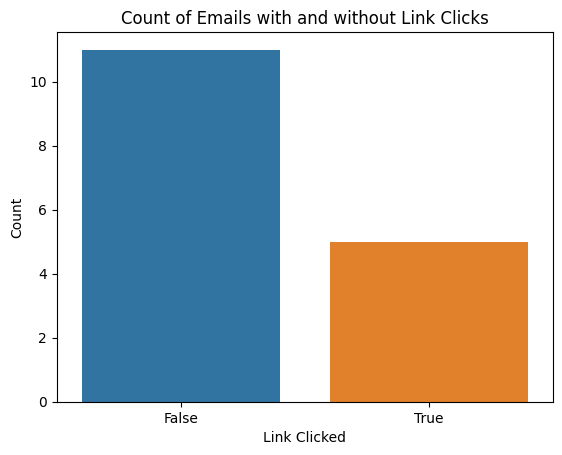

In [43]:

# Assuming 'meeting_link_clicked' is the column indicating whether the link was clicked
sns.countplot(x='meeting_link_clicked', data=df_new)
plt.title('Count of Emails with and without Link Clicks')
plt.xlabel('Link Clicked')
plt.ylabel('Count')
plt.show()

Count of Emails with and without Link Clicks:


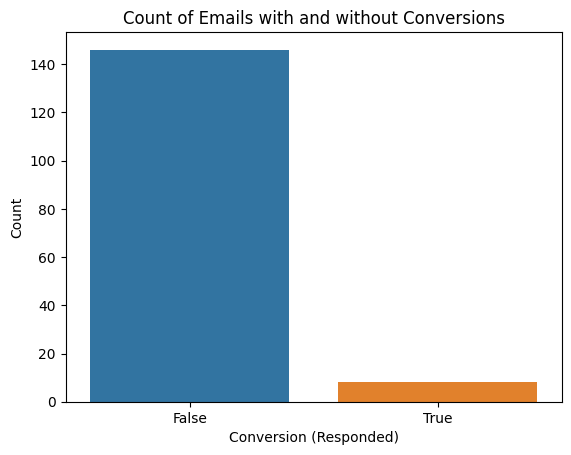

In [44]:
# Assuming 'responded' is the column indicating whether the email resulted in a conversion
sns.countplot(x='responded', data=df_new)
plt.title('Count of Emails with and without Conversions')
plt.xlabel('Conversion (Responded)')
plt.ylabel('Count')
plt.show()

Count of Emails with and without Conversions:


**Handling Missing Values:**

In [45]:
#Checked for missing values in the selected subset.
df_new.isna().sum()

subject                   1
body                      1
opened                    1
meeting link clicked     17
responded                 1
meeting_link_clicked    139
dtype: int64

Identified missing values in columns 'subject,' 'body,' 'opened,' 'meeting link clicked,' 'responded,' and 'meeting_link_clicked.'

In [46]:
df_new.shape

(155, 6)

Addressed missing values in the 'meeting link clicked' column by creating a new column 'MeetingLinkClicked' using the 'meeting_link_clicked' and 'meeting_link_clicked' columns.

In [47]:
df_new['MeetingLinkClicked'] = np.where(df_new['meeting link clicked'].isnull(), df_new['meeting_link_clicked'], df_new['meeting link clicked'])

<ipython-input-47-dcc66ab437a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MeetingLinkClicked'] = np.where(df_new['meeting link clicked'].isnull(), df_new['meeting_link_clicked'], df_new['meeting link clicked'])


In [48]:
#Updated DataFrame:
df_new.head()

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked,MeetingLinkClicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN,False
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN,True
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN,False


**Text Preprocessing:**


In [49]:
!pip install emoji

In [50]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import download
import emoji

In [51]:
# Download NLTK resources
download('stopwords')
download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Cleaning and Standardizing Text:
Utilized the NLTK library for text preprocessing, including converting to lowercase, removing special characters, numbers, and punctuations.

In [52]:
# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
     # Stemming
#     stemmer = PorterStemmer()
#     tokens = [stemmer.stem(word) for word in tokens]
#     # Join tokens back into a string
    processed_text = ' '.join(tokens)
    return processed_text
def remove_emojis(text):
    return emoji.demojize(text)
words_to_remove=["Recipient's Name","lets","meeting link","name",'let']
def remove_text(text):
    for word in words_to_remove:
        text = text.replace(word, ' ')
    return text

Displaying Processed DataFrame:


In [53]:
df_new['body']=df_new['body'].astype(str)
df_new['subject']=df_new['subject'].astype(str)

<ipython-input-53-51011424dde3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['body']=df_new['body'].astype(str)
<ipython-input-53-51011424dde3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['subject']=df_new['subject'].astype(str)


Updated DataFrame:

In [54]:
# Apply text preprocessing to 'subject' and 'body' columns
df_new['subject_processed'] = df_new['subject'].apply(remove_text)
df_new['body_processed'] = df_new['body'].apply(remove_text)
df_new['subject_processed'] = df_new['subject_processed'].apply(remove_emojis)
df_new['body_processed'] = df_new['body_processed'].apply(remove_emojis)
df_new['subject_processed'] = df_new['subject_processed'].apply(preprocess_text)
df_new['body_processed'] = df_new['body_processed'].apply(preprocess_text)

# Display the processed DataFrame
df_new[['opened','MeetingLinkClicked', 'responded','subject_processed', 'body_processed','body']].head()

,opened,MeetingLinkClicked,responded,subject_processed,body_processed,body
0,False,False,False,rocket propel marketing roi advanced analytics,hey ready see marketing performance soar cutti...,"Hey [Recipient's Name],\n\nReady to see your m..."
1,True,False,False,data superpower barchart unlock insights us,hi im reaching believe last message mightve sl...,"Hi [Recipient's Name],\n\nI'm reaching out aga..."
2,False,False,False,turn marketing data decisions facewithmonocle ...,greetings havent connected yet im convinced bu...,"Greetings [Recipient's Name],\n\nWe haven't co..."
3,True,True,False,marketing success click away lets chat analytics,hello clear youre serious business success unt...,"Hello [Recipient's Name],\n\nIt's clear that y..."
4,False,False,False,rocket boost brands visibility proven marketin...,hi digital age data powerespecially marketing ...,"Hi [Recipient's Name],\n\nIn the digital age, ..."


In [55]:
df_new.dtypes

subject                 object
body                    object
opened                  object
meeting link clicked    object
responded               object
meeting_link_clicked    object
MeetingLinkClicked      object
subject_processed       object
body_processed          object
dtype: object

In [56]:
# df_new[df_new['opened']==False]

**Exploratory Data Analysis (EDA) with Word Clouds:**

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Word Clouds for Unopened Emails:
Generated a word cloud for the 'subject_processed' text of unopened emails.

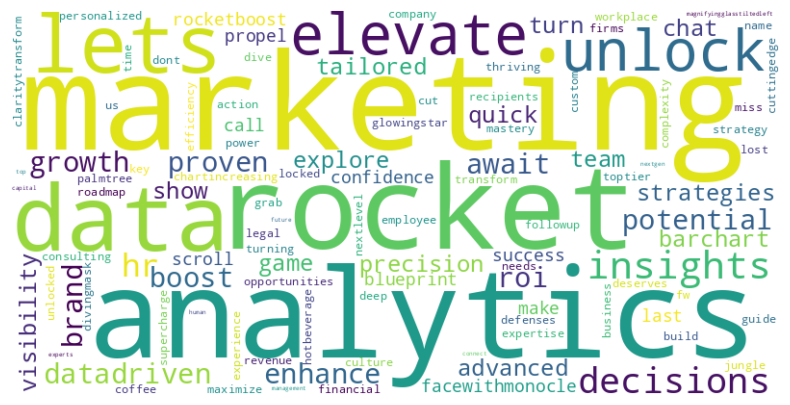

In [58]:
df_unopened=df_new[df_new['opened']==False]

all_text = ' '.join(df_unopened['subject_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Clouds for Opened Emails:
Generated a word cloud for the 'subject_processed' text of opened emails.

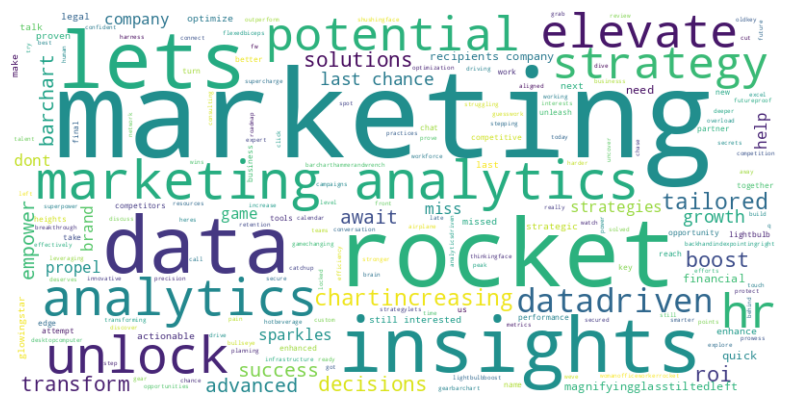

In [59]:
df_opened=df_new[df_new['opened']==True]

all_text = ' '.join(df_opened['subject_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Clouds for not Responded Emails (Body Text):
Generated a word cloud for the 'body_processed' text of not responded emails.

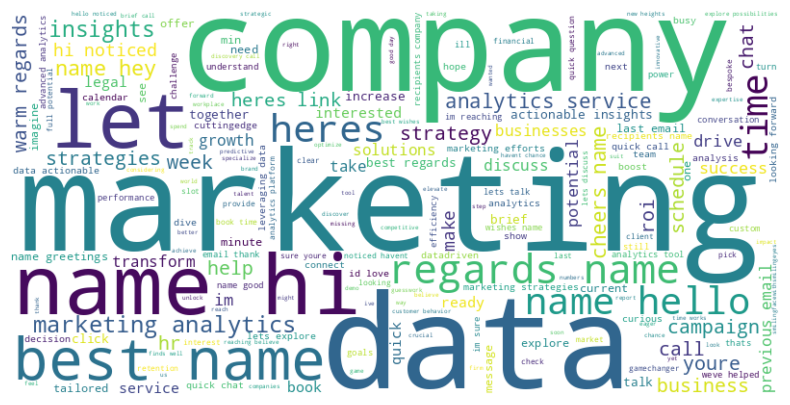

In [60]:
df_unopened=df_new[df_new['responded']==False]

all_text = ' '.join(df_unopened['body_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Clouds for Responded Emails:
Generated a word cloud for the 'body_processed' text of responded emails.

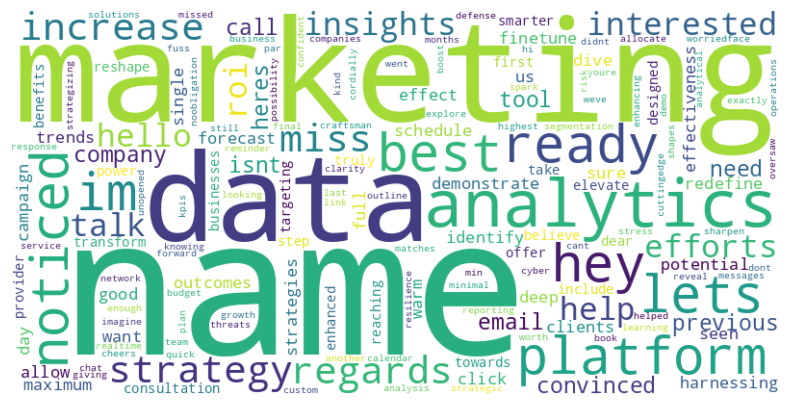

In [61]:
df_opened=df_new[df_new['responded']==True]

all_text = ' '.join(df_opened['body_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
df_new['text'] = df_new['body_processed'] + ' ' + df_new['subject_processed']

In [63]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [64]:
df_new=df_new.dropna(subset=['opened'])

In [65]:
df_new.isna().sum()

subject                   0
body                      0
opened                    0
meeting link clicked     16
responded                 0
meeting_link_clicked    138
MeetingLinkClicked        0
subject_processed         0
body_processed            0
text                      0
dtype: int64

**MODEL BUILDING**
Random Forest classifiers using Bag-of-Words (BoW)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
df_new['opened']=df_new['opened'].astype(str)
df_new['opened']=df_new['opened'].replace('1', 'True')
df_new['opened']=df_new['opened'].replace('0', 'False')
X = df_new['text']
y = df_new['opened']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-66-c37cb3e2f340>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['opened']=df_new['opened'].astype(str)
<ipython-input-66-c37cb3e2f340>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['opened']=df_new['opened'].replace('1', 'True')
<ipython-input-66-c37cb3e2f340>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [67]:
y_train.value_counts()

True     87
False    36
Name: opened, dtype: int64

 stemmed and lemmatized text.

In [68]:
# Stemming
stemmer = PorterStemmer()
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

X_train_stemmed = X_train.apply(stem_text)
X_test_stemmed = X_test.apply(stem_text)
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)
# Bag-of-Words Vectorization
bow_vectorizer = CountVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_bow_stemmed = bow_vectorizer.fit_transform(X_train_stemmed)
X_test_bow_stemmed = bow_vectorizer.transform(X_test_stemmed)

X_train_bow_lemmatized = bow_vectorizer.fit_transform(X_train_lemmatized)
X_test_bow_lemmatized = bow_vectorizer.transform(X_test_lemmatized)

# Build a Random Forest Classifier for stemmed text
clf_bow_stemmed = RandomForestClassifier(random_state=42)
clf_bow_stemmed.fit(X_train_bow_stemmed, y_train)

# Build a Random Forest Classifier for lemmatized text
clf_bow_lemmatized = RandomForestClassifier(random_state=42)
clf_bow_lemmatized.fit(X_train_bow_lemmatized, y_train)

# Make predictions on the test set for stemmed text
y_pred_bow_stemmed = clf_bow_stemmed.predict(X_test_bow_stemmed)

# Make predictions on the test set for lemmatized text
y_pred_bow_lemmatized = clf_bow_lemmatized.predict(X_test_bow_lemmatized)

# Evaluate the models for stemmed text
accuracy_bow_stemmed = accuracy_score(y_test, y_pred_bow_stemmed)
print(f"Accuracy (BoW - Stemmed): {accuracy_bow_stemmed:.2f}")

# Evaluate the models for lemmatized text
accuracy_bow_lemmatized = accuracy_score(y_test, y_pred_bow_lemmatized)
print(f"Accuracy (BoW - Lemmatized): {accuracy_bow_lemmatized:.2f}")

Accuracy (BoW - Stemmed): 0.87
Accuracy (BoW - Lemmatized): 0.87


TF-IDF vectorization on both stemmed and lemmatized text.

In [69]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

X_train_tfidf_stemmed = tfidf_vectorizer.fit_transform(X_train_stemmed)
X_test_tfidf_stemmed = tfidf_vectorizer.transform(X_test_stemmed)

X_train_tfidf_lemmatized = tfidf_vectorizer.fit_transform(X_train_lemmatized)
X_test_tfidf_lemmatized = tfidf_vectorizer.transform(X_test_lemmatized)

#Build a Random Forest Classifier for stemmed text
clf_stemmed = RandomForestClassifier(random_state=42)
clf_stemmed.fit(X_train_tfidf_stemmed, y_train)

#Build a Random Forest Classifier for lemmatized text
clf_lemmatized = RandomForestClassifier(random_state=42)
clf_lemmatized.fit(X_train_tfidf_lemmatized, y_train)

# Make predictions on the test set for stemmed text
y_pred_stemmed = clf_stemmed.predict(X_test_tfidf_stemmed)

# Make predictions on the test set for lemmatized text
y_pred_lemmatized = clf_lemmatized.predict(X_test_tfidf_lemmatized)

# Evaluate the models for stemmed text
accuracy_stemmed = accuracy_score(y_test, y_pred_stemmed)
print(f"Accuracy (Stemmed): {accuracy_stemmed:.2f}")

# Evaluate the models for lemmatized text
accuracy_lemmatized = accuracy_score(y_test, y_pred_lemmatized)
print(f"Accuracy (Lemmatized): {accuracy_lemmatized:.2f}")

Accuracy (Stemmed): 0.87
Accuracy (Lemmatized): 0.87


Achieved an accuracy of 87%.

Ensemble of Multiple machine learning models and evaluating their performance on both Bag-of-Words (BoW) and TF-IDF vectorized representations of the text.

In [70]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'kNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_bow_stemmed, y_train)
    y_pred = model.predict(X_test_bow_stemmed)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} (BoW - Stemmed) - Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*40 + "\n")

Random Forest (BoW - Stemmed) - Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.87      1.00      0.93        27

    accuracy                           0.87        31
   macro avg       0.44      0.50      0.47        31
weighted avg       0.76      0.87      0.81        31


Confusion Matrix:
[[ 0  4]
 [ 0 27]]


Logistic Regression (BoW - Stemmed) - Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.86      0.93      0.89        27

    accuracy                           0.81        31
   macro avg       0.43      0.46      0.45        31
weighted avg       0.75      0.81      0.78        31


Confusion Matrix:
[[ 0  4]
 [ 2 25]]


SVM (BoW - Stemmed) - Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [71]:
models = {
    'Random Forest': RandomForestClassifier(random_state=5),
    'Logistic Regression': LogisticRegression(random_state=5),
    'SVM': SVC(random_state=42),
    'kNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_tfidf_stemmed, y_train)
    y_pred = model.predict(X_test_tfidf_stemmed)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} (TFIDF - Stemmed) - Accuracy: {accuracy:.2f}")
    print("\nClassification Report For TFIDF Vectorized:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix For TFIDF Vectorized:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*40 + "\n")

Random Forest (TFIDF - Stemmed) - Accuracy: 0.87

Classification Report For TFIDF Vectorized:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.87      1.00      0.93        27

    accuracy                           0.87        31
   macro avg       0.44      0.50      0.47        31
weighted avg       0.76      0.87      0.81        31


Confusion Matrix For TFIDF Vectorized:
[[ 0  4]
 [ 0 27]]


Logistic Regression (TFIDF - Stemmed) - Accuracy: 0.87

Classification Report For TFIDF Vectorized:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.87      1.00      0.93        27

    accuracy                           0.87        31
   macro avg       0.44      0.50      0.47        31
weighted avg       0.76      0.87      0.81        31


Confusion Matrix For TFIDF Vectorized:
[[ 0  4]
 [ 0 27]]


SVM (TFIDF - Stemmed) - Accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Hyperparameter Tuning:**

In [72]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=5)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 20,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_bow_stemmed, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_bow_stemmed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 40}
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.87      1.00      0.93        27

    accuracy                           0.87        31
   macro avg       0.44      0.50      0.47        31
weighted avg       0.76      0.87      0.81        31


Confusion Matrix:
[[ 0  4]
 [ 0 27]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
